In [ ]:
!gdown 1FkSwhY013rJVB_eG0MERzDmqK6p0VOiy

Downloading...
From: https://drive.google.com/uc?id=1FkSwhY013rJVB_eG0MERzDmqK6p0VOiy
To: /content/teleCust1000t.csv
100% 37.0k/37.0k [00:00<00:00, 75.1MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('teleCust1000t.csv')
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


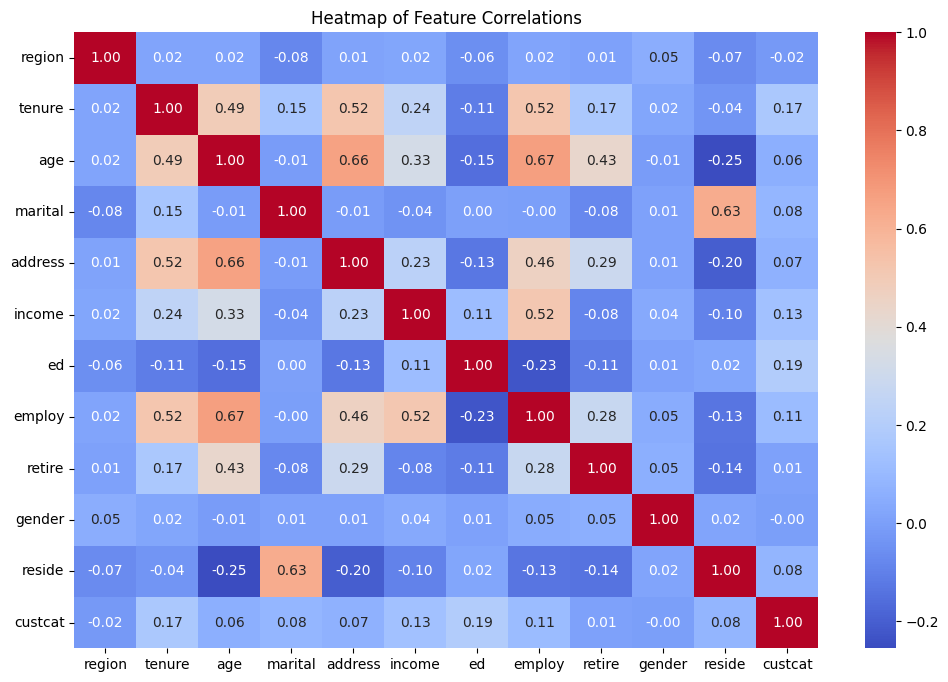

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

In [ ]:
target_corr = correlation_matrix['custcat'].drop('custcat')
top_features = target_corr.abs().sort_values(ascending=False).head(2).index
print(f"Top 2 features correlated with the target: {top_features.tolist()}")

Top 2 features correlated with the target: ['ed', 'tenure']


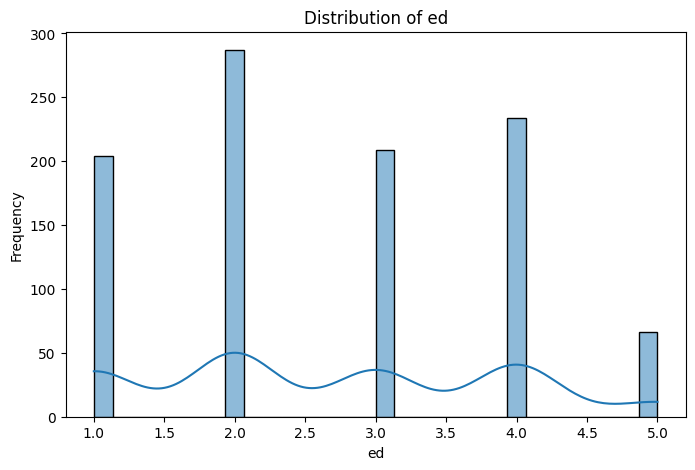

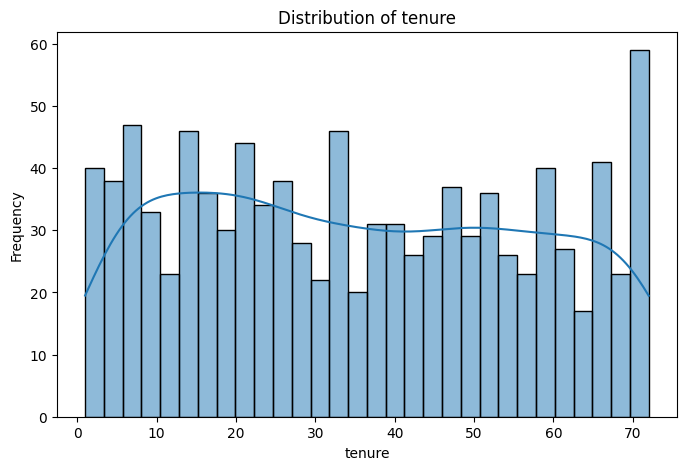

In [ ]:
for feature in top_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your dataset (make sure it's defined beforehand)
scaler = MinMaxScaler()

# Fit the scaler and transform the data
scaled_data = scaler.fit_transform(data)

# Convert the scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_data)

# Print the first few rows of the scaled data
print(scaled_df.head())

# Split the features (X) and target (Y)
X = scaled_df.iloc[:, :-1].to_numpy()  # All rows, all columns except the last
Y = scaled_df.iloc[:, -1].to_numpy()   # All rows, last column

# Now you have X as features and Y as target


    0         1         2    3         4         5     6         7    8    9   \
0  0.5  0.169014  0.440678  1.0  0.163636  0.033153  0.75  0.106383  0.0  0.0   
1  1.0  0.140845  0.254237  1.0  0.127273  0.076552  1.00  0.106383  0.0  0.0   
2  1.0  0.943662  0.576271  1.0  0.436364  0.064497  0.00  0.617021  0.0  1.0   
3  0.5  0.450704  0.254237  0.0  0.218182  0.014467  0.25  0.000000  0.0  1.0   
4  0.5  0.309859  0.203390  1.0  0.163636  0.012658  0.00  0.042553  0.0  0.0   

         10        11  
0  0.142857  0.000000  
1  0.714286  1.000000  
2  0.142857  0.666667  
3  0.000000  0.000000  
4  0.428571  0.666667  


In [ ]:
import numpy as np

# Assuming Y has 1000 elements
tmp = np.zeros((1000, 4))

# Define the conditions and corresponding column index values
conditions = [
    np.round(Y, 1) == 0,
    np.round(Y, 1) == 0.3,
    np.round(Y, 1) == 0.7,
    np.round(Y, 1) == 1
]

# Set corresponding columns to 1 based on conditions
tmp = np.array([np.array(cond, dtype=int) for cond in zip(*conditions)])

# Assign back to Y
Y = tmp


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Further split the test data into validation (25% of test, 20% of total), remaining 75% for test
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.25, random_state=13)

# Print the shapes of the resulting splits
print(f'y_test shape: {y_test.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'x_train shape: {x_train.shape}')


y_test shape: (150, 4)
y_val shape: (50, 4)
x_train shape: (800, 11)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(20, input_shape=(X.shape[1],), activation='relu'),  # input layer with activation function
    Dense(16, activation='relu'),  # hidden layer with activation function
    Dense(12, activation='relu'),  # hidden layer with activation function
    Dense(4, activation='softmax')  # output layer with softmax for multi-class classification
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',  # loss function for multi-class classification
    optimizer='sgd',  # Stochastic Gradient Descent optimizer
    metrics=['accuracy']  # track accuracy during training
)

# Train the model
model.fit(
    x_train, y_train,  # training data
    epochs=200,  # number of training epochs
    batch_size=400,  # batch size
    validation_data=(x_val, y_val)  # optionally include validation data
)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.2342 - loss: 1.3967 - val_accuracy: 0.1200 - val_loss: 1.4304
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2325 - loss: 1.3978 - val_accuracy: 0.1200 - val_loss: 1.4282
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2483 - loss: 1.3908 - val_accuracy: 0.1200 - val_loss: 1.4261
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2367 - loss: 1.3939 - val_accuracy: 0.1400 - val_loss: 1.4240
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2358 - loss: 1.3954 - val_accuracy: 0.1400 - val_loss: 1.4221
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2375 - loss: 1.3922 - val_accuracy: 0.1400 - val_loss: 1.4204
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2467 - loss: 1.3907 - val_accuracy: 0.1400 - val_loss: 1.4187
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2442 - loss: 1.3919 - val_accuracy: 0.1400 - val_loss: 1.4171
Epo

In [ ]:
# Predict the class probabilities for the test set
Y_pred = model.predict(x_test)

# Convert predicted probabilities to class labels (the index of the highest probability)
y_pred_classes = np.argmax(Y_pred, axis=1)

# Convert true one-hot encoded labels to class labels
y_true_classes = np.argmax(y_test, axis=1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Accuracy: 0.3200


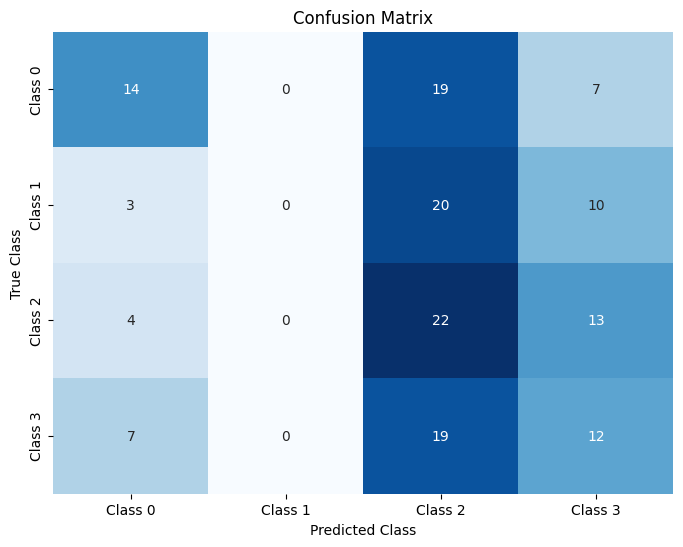

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = (y_true_classes == y_pred_classes).mean()
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step - accuracy: 0.2650 - loss: 1.5556 - val_accuracy: 0.2200 - val_loss: 1.4159
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2725 - loss: 1.5519 - val_accuracy: 0.2200 - val_loss: 1.4153
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2600 - loss: 1.5397 - val_accuracy: 0.2200 - val_loss: 1.4146
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2650 - loss: 1.5263 - val_accuracy: 0.2200 - val_loss: 1.4138
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2667 - loss: 1.5203 - val_accuracy: 0.2400 - val_loss: 1.4130
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2700 - loss: 1.5074 - val_accuracy: 0.2400 - val_loss: 1.4120
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2692 - loss: 1.5031 - val_accuracy: 0.2600 - val_loss: 1.4111
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2767 - loss: 1.4929 - val_accuracy: 0.2600 - val_loss: 1.4102
Epo

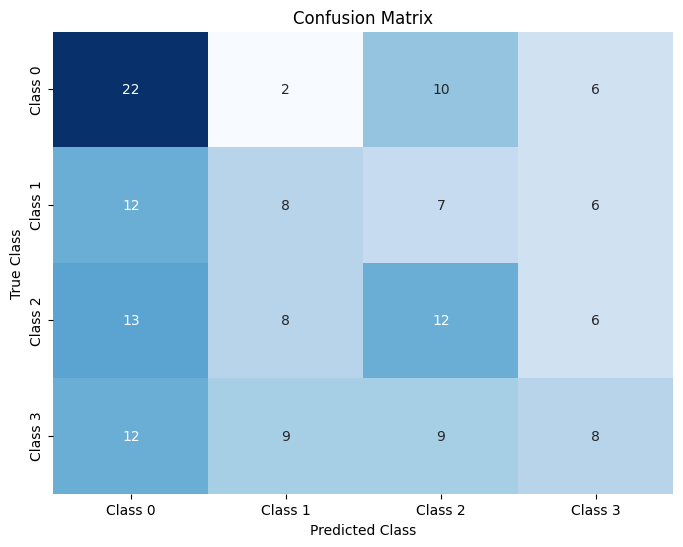

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the model with Batch Normalization
model3 = Sequential([
    Dense(20, input_shape=(X.shape[1],), activation='relu'),  # Input layer
    BatchNormalization(),  # Batch normalization layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(12, activation='relu'),  # Hidden layer
    Dense(4, activation='softmax')  # Output layer
])

# Compile the model
model3.compile(
    loss='categorical_crossentropy',  # Loss function
    optimizer='sgd',  # Stochastic Gradient Descent optimizer
    metrics=['accuracy']  # Track accuracy during training
)

# Train the model
model3.fit(
    x_train, y_train,  # Training data
    epochs=200,  # Number of epochs
    batch_size=400,  # Batch size
    validation_data=(x_val, y_val)  # Validation data
)

# Predict on the test set
Y_pred3 = model3.predict(x_test)

# Convert probabilities to class labels
y_pred_classes3 = np.argmax(Y_pred3, axis=1)

# Convert true labels to class labels (if one-hot encoded)
y_true_classes3 = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy3 = (y_true_classes3 == y_pred_classes3).mean()
print(f"Accuracy: {accuracy3:.4f}")

# Generate confusion matrix
cm3 = confusion_matrix(y_true_classes3, y_pred_classes3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.2217 - loss: 1.6607 - val_accuracy: 0.3000 - val_loss: 1.5086
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2258 - loss: 1.6495 - val_accuracy: 0.3000 - val_loss: 1.5043
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2133 - loss: 1.6413 - val_accuracy: 0.3000 - val_loss: 1.5004
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2150 - loss: 1.6288 - val_accuracy: 0.3000 - val_loss: 1.4966
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2250 - loss: 1.6242 - val_accuracy: 0.3000 - val_loss: 1.4930
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2175 - loss: 1.6061 - val_accuracy: 0.2800 - val_loss: 1.4895
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2192 - loss: 1.6018 - val_accuracy: 0.2800 - val_loss: 1.4863
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2258 - loss: 1.5912 - val_accuracy: 0.3000 - val_loss

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy: 0.3733


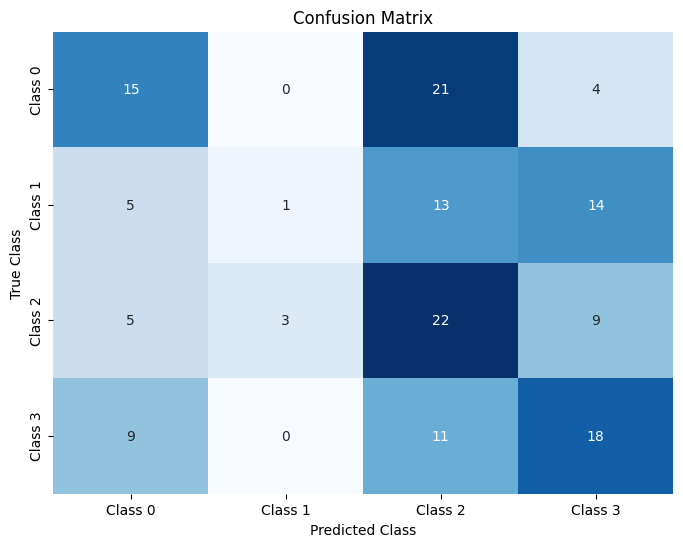

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the model
model4 = Sequential([
    Dense(20, input_shape=(X.shape[1],), activation='relu'),  # Input layer
    BatchNormalization(),  # Batch normalization layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(4, activation='softmax')  # Output layer
])

# Compile the model
model4.compile(
    loss='categorical_crossentropy',  # Loss function
    optimizer='sgd',  # Stochastic Gradient Descent optimizer
    metrics=['accuracy']  # Track accuracy during training
)

# Train the model
model4.fit(
    x_train, y_train,  # Training data
    epochs=200,  # Number of epochs
    batch_size=400,  # Batch size
    validation_data=(x_val, y_val)  # Validation data
)

# Predict on the test set
Y_pred4 = model4.predict(x_test)

# Convert probabilities to class labels
y_pred_classes4 = np.argmax(Y_pred4, axis=1)

# Convert true labels to class labels (if one-hot encoded)
y_true_classes4 = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy4 = (y_true_classes4 == y_pred_classes4).mean()
print(f"Accuracy: {accuracy4:.4f}")

# Generate confusion matrix
cm4 = confusion_matrix(y_true_classes4, y_pred_classes4)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


# dropout

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.2175 - loss: 1.6252 - val_accuracy: 0.3600 - val_loss: 1.3903
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2075 - loss: 1.6241 - val_accuracy: 0.3400 - val_loss: 1.3900
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2275 - loss: 1.5823 - val_accuracy: 0.3400 - val_loss: 1.3896
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2150 - loss: 1.5990 - val_accuracy: 0.3400 - val_loss: 1.3893
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2200 - loss: 1.6096 - val_accuracy: 0.3200 - val_loss: 1.3894
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2375 - loss: 1.5760 - val_accuracy: 0.3000 - val_loss: 1.3894
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2275 - loss: 1.5711 - val_accuracy: 0.3000 - val_loss: 1.3895
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2042 - loss: 1.5592 - val_accuracy: 0.2800 - val_loss: 1.3897
Epo

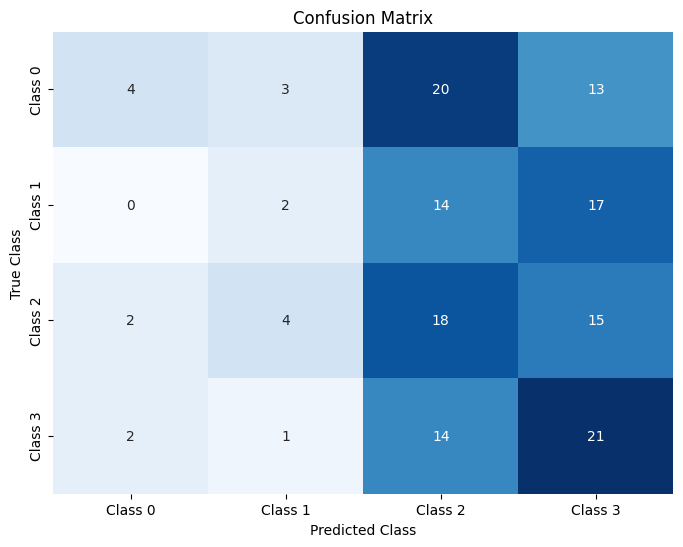

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the model
model5 = Sequential([
    Dense(20, input_shape=(X.shape[1],), activation='relu'),  # Input layer
    BatchNormalization(),  # Batch normalization for stable and faster training
    Dense(16, activation='relu'),  # Hidden layer
    Dropout(0.25),  # Dropout layer to reduce overfitting
    Dense(12, activation='relu'),  # Another hidden layer
    Dropout(0.25),  # Additional dropout
    Dense(4, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model5.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer='sgd',  # Stochastic Gradient Descent optimizer
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train the model
model5.fit(
    x_train, y_train,  # Training data
    epochs=200,  # Number of training iterations
    batch_size=400,  # Number of samples per batch
    validation_data=(x_val, y_val)  # Validation data
)

# Predict on the test set
Y_pred5 = model5.predict(x_test)

# Convert predictions and true labels to class indices
y_pred_classes5 = np.argmax(Y_pred5, axis=1)  # Predicted class labels
y_true_classes5 = np.argmax(y_test, axis=1)  # True class labels (if one-hot encoded)

# Calculate accuracy
accuracy5 = (y_true_classes5 == y_pred_classes5).mean()
print(f"Accuracy: {accuracy5:.4f}")

# Generate confusion matrix
cm5 = confusion_matrix(y_true_classes5, y_pred_classes5)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 563ms/step - accuracy: 0.2325 - loss: 1.6447 - val_accuracy: 0.2200 - val_loss: 1.5100
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2108 - loss: 1.7020 - val_accuracy: 0.1800 - val_loss: 1.5038
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2017 - loss: 1.6633 - val_accuracy: 0.2000 - val_loss: 1.4983
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.1933 - loss: 1.6788 - val_accuracy: 0.2000 - val_loss: 1.4930
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2150 - loss: 1.6790 - val_accuracy: 0.2000 - val_loss: 1.4879
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2292 - loss: 1.6598 - val_accuracy: 0.2000 - val_loss: 1.4829
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2292 - loss: 1.6173 - val_accuracy: 0.2000 - val_loss: 1.4782
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2142 - loss: 1.6036 - val_accuracy: 0.2400 - val_lo

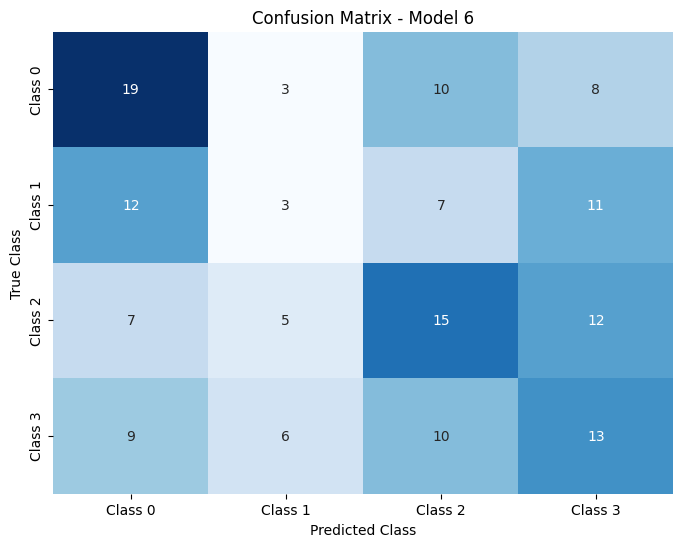

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define Model 6
model6 = Sequential([
    Dense(20, input_shape=(X.shape[1],), activation='relu'),  # Input layer
    BatchNormalization(),  # Batch normalization for stable training
    Dense(16, activation='relu'),  # Hidden layer
    Dropout(0.25),  # Dropout layer to prevent overfitting
    Dense(4, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model6.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer='sgd',  # Stochastic Gradient Descent optimizer
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train the model
model6.fit(
    x_train, y_train,  # Training data
    epochs=200,  # Number of training iterations
    batch_size=400,  # Number of samples per batch
    validation_data=(x_val, y_val)  # Validation data
)

# Predict on the test set
Y_pred6 = model6.predict(x_test)

# Convert predictions and true labels to class indices
y_pred_classes6 = np.argmax(Y_pred6, axis=1)  # Predicted class labels
y_true_classes6 = np.argmax(y_test, axis=1)  # True class labels (if one-hot encoded)

# Calculate accuracy
accuracy6 = (y_true_classes6 == y_pred_classes6).mean()
print(f"Accuracy: {accuracy6:.4f}")

# Generate confusion matrix
cm6 = confusion_matrix(y_true_classes6, y_pred_classes6)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm6, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], cbar=False)
plt.title('Confusion Matrix - Model 6')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


# L2-Regularization

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step - accuracy: 0.2392 - loss: 1.5217 - val_accuracy: 0.3600 - val_loss: 1.3857
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2108 - loss: 1.5216 - val_accuracy: 0.3600 - val_loss: 1.3856
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2358 - loss: 1.5082 - val_accuracy: 0.3600 - val_loss: 1.3855
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2233 - loss: 1.5062 - val_accuracy: 0.3400 - val_loss: 1.3854
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2458 - loss: 1.4968 - val_accuracy: 0.3200 - val_loss: 1.3853
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2400 - loss: 1.5027 - val_accuracy: 0.3000 - val_loss: 1.3852
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2442 - loss: 1.4966 - val_accuracy: 0.2800 - val_loss: 1.3850
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2417 - loss: 1.4926 - val_accuracy: 0.2800 - val_loss: 1.3849
Epo

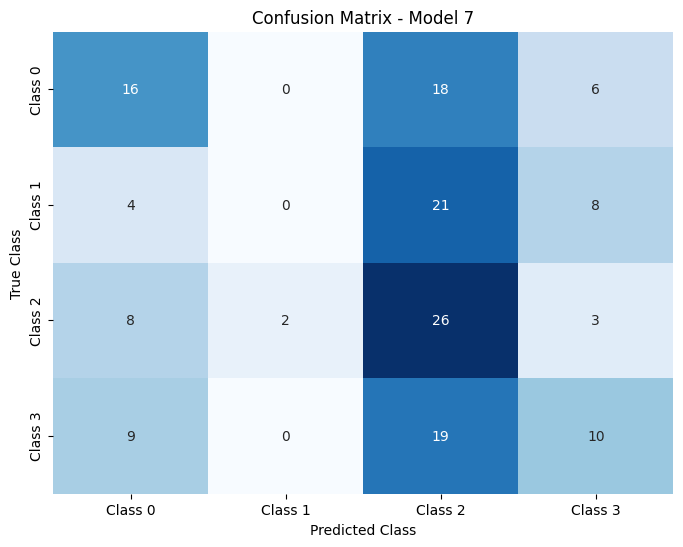

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define Model 7
model7 = Sequential([
    Dense(20, input_shape=(X.shape[1],), activation='relu'),  # Input layer
    BatchNormalization(),  # Batch normalization for stable training
    Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),  # Hidden layer with L2 regularization
    Dense(12, activation='relu', kernel_regularizer=l2(0.0001)),  # Additional hidden layer with L2 regularization
    Dense(4, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model7.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer='sgd',  # Stochastic Gradient Descent optimizer
    metrics=['accuracy']  # Monitor accuracy during training
)

# Train the model
model7.fit(
    x_train, y_train,  # Training data
    epochs=200,  # Number of training iterations
    batch_size=400,  # Number of samples per batch
    validation_data=(x_val, y_val)  # Validation data
)

# Predict on the test set
Y_pred7 = model7.predict(x_test)

# Convert predictions and true labels to class indices
y_pred_classes7 = np.argmax(Y_pred7, axis=1)  # Predicted class labels
y_true_classes7 = np.argmax(y_test, axis=1)  # True class labels (if one-hot encoded)

# Calculate accuracy
accuracy7 = (y_true_classes7 == y_pred_classes7).mean()
print(f"Accuracy: {accuracy7:.4f}")

# Generate confusion matrix
cm7 = confusion_matrix(y_true_classes7, y_pred_classes7)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm7, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], cbar=False)
plt.title('Confusion Matrix - Model 7')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


# تست روی ترینینگ دیتا

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.3575


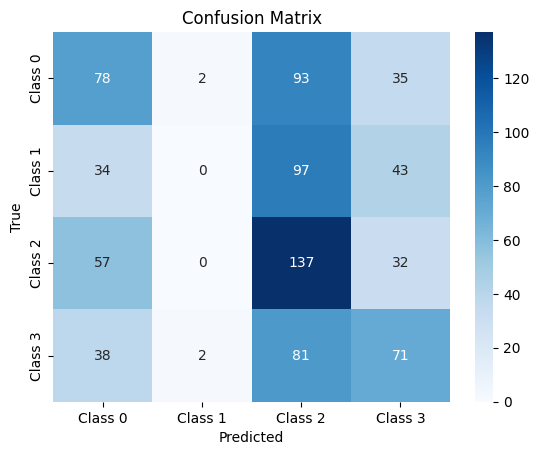

In [ ]:
# Predict on the training data
Y_pred72 = model7.predict(x_train)

# Convert predicted probabilities to class labels
y_pred_classes72 = np.argmax(Y_pred72, axis=1)

# Convert true labels (one-hot encoded) to class labels
y_true_classes72 = np.argmax(y_train, axis=1)

# Calculate accuracy
accuracy72 = np.mean(y_true_classes72 == y_pred_classes72)
print(f"Accuracy: {accuracy72:.4f}")

# Generate confusion matrix
cm72 = confusion_matrix(y_true_classes72, y_pred_classes72)

# Plot confusion matrix
sns.heatmap(cm72, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Print predicted and actual values for the first 10 samples
for i in range(10):
    print(f"Predicted value: {y_pred_classes72[i]} | Actual value: {y_true_classes72[i]}")


Predicted value: 2 | Actual value: 1
Predicted value: 3 | Actual value: 0
Predicted value: 3 | Actual value: 0
Predicted value: 0 | Actual value: 3
Predicted value: 3 | Actual value: 3
Predicted value: 2 | Actual value: 0
Predicted value: 2 | Actual value: 3
Predicted value: 2 | Actual value: 1
Predicted value: 2 | Actual value: 3
Predicted value: 0 | Actual value: 2


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.7419 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6724 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6250 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5723 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5326 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4860 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4493 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4385 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4223 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4091 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3725 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3657 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3556 
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3548 
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3412 
Epoch 16/200
2/2 ━

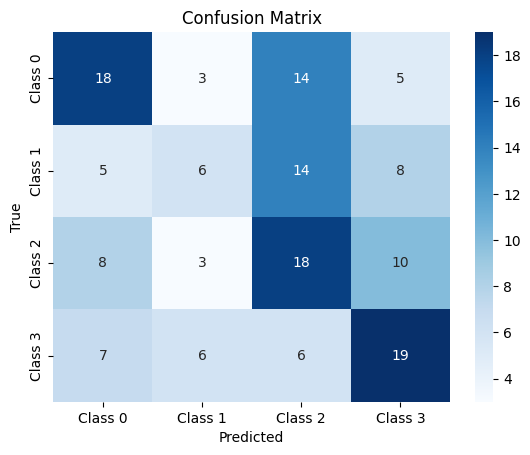

In [ ]:
# Build the model
model8 = Sequential([
    Dense(20),  # Input layer with 20 neurons
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),  # Hidden layer with L2 regularization
    Dense(4, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model8.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Categorical crossentropy loss for multi-class classification
    optimizer=tf.keras.optimizers.SGD()  # Stochastic Gradient Descent optimizer
)

# Train the model
model8.fit(
    x_train, y_train,  # Training data and labels
    epochs=200,  # Number of epochs
    batch_size=400  # Batch size for training
)

# Predict using the trained model
Y_pred8 = model8.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes8 = np.argmax(Y_pred8, axis=1)

# Convert true one-hot encoded labels to class labels
y_true_classes8 = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy8 = np.mean(y_true_classes8 == y_pred_classes8)
print(f"Accuracy: {accuracy8:.4f}")

# Generate and display confusion matrix
cm8 = confusion_matrix(y_true_classes8, y_pred_classes8)
sns.heatmap(cm8, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.8967
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7506 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.6197 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5710 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5210 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4860 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4416 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4181 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3897 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3805 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3658 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3447 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3314 
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3166 
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3148 
Epoch 16/200
2/2 ━━━

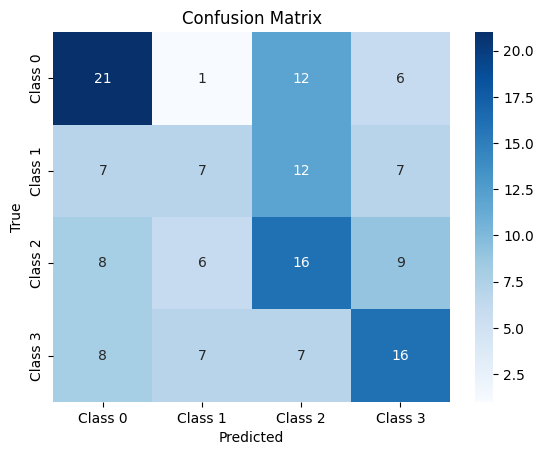

In [ ]:
# Build the model
model9 = Sequential([
    Dense(20),  # Input layer with 20 neurons
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),  # Hidden layer with L2 regularization
    Dense(12, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),  # Hidden layer with L2 regularization
    Dense(4, activation='softmax')  # Output layer with softmax activation
])

# Compile the model with RMSprop optimizer
model9.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Categorical crossentropy loss
    optimizer=tf.keras.optimizers.RMSprop()  # RMSprop optimizer
)

# Train the model
model9.fit(
    x_train, y_train,  # Training data and labels
    epochs=200,  # Number of epochs
    batch_size=400  # Batch size for training
)

# Predict using the trained model
Y_pred9 = model9.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes9 = np.argmax(Y_pred9, axis=1)

# Convert true one-hot encoded labels to class labels
y_true_classes9 = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy9 = np.mean(y_true_classes9 == y_pred_classes9)
print(f"Accuracy: {accuracy9:.4f}")

# Generate and display confusion matrix
cm9 = confusion_matrix(y_true_classes9, y_pred_classes9)
sns.heatmap(cm9, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
